In [141]:
%matplotlib inline

import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import mapping
import shapely.speedups
import matplotlib.pyplot as plt
import timeit

# change default figsize 
plt.rcParams['figure.figsize'] = (15, 12)

In [227]:
states = gpd.read_file('http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_state_20m.zip')
town = gpd.read_file('https://www.chapelhillopendata.org/api/v2/catalog/datasets/overlay-zoning-districts/exports/geojson')
urban = gpd.read_file('http://www2.census.gov/geo/tiger/GENZ2017/shp/cb_2017_us_ua10_500k.zip')
bicycles = gpd.read_file('https://www.chapelhillopendata.org/api/v2/catalog/datasets/bicycle-crash-data-chapel-hill-region/exports/geojson')
streets = gpd.read_file('https://www.chapelhillopendata.org/api/v2/catalog/datasets/streets/exports/geojson')
parks = gpd.read_file('https://www.chapelhillopendata.org/api/v2/catalog/datasets/chapel-hill-parks-and-rec-facilities/exports/geojson')
bus = gpd.read_file('https://www.chapelhillopendata.org/api/v2/catalog/datasets/nextbus/exports/geojson')
lines = gpd.read_file('https://www.chapelhillopendata.org/api/v2/catalog/datasets/chapel-hill-bike-map-lines/exports/geojson')


    

In [143]:
print(states.crs, town.crs, urban.crs, bicycles.crs, streets.crs, parks.crs, bus.crs, lines.crs)

{'init': 'epsg:4269'} {'init': 'epsg:4326'} {'init': 'epsg:4269'} {'init': 'epsg:4326'} {'init': 'epsg:4326'} {'init': 'epsg:4326'} {'init': 'epsg:4326'} {'init': 'epsg:4326'}


In [228]:
states.to_crs(epsg=4326, inplace=True)
states.crs

{'init': 'epsg:4326', 'no_defs': True}

In [129]:
urban.to_crs(epsg=4326, inplace=True)
urban.crs

{'init': 'epsg:4326', 'no_defs': True}

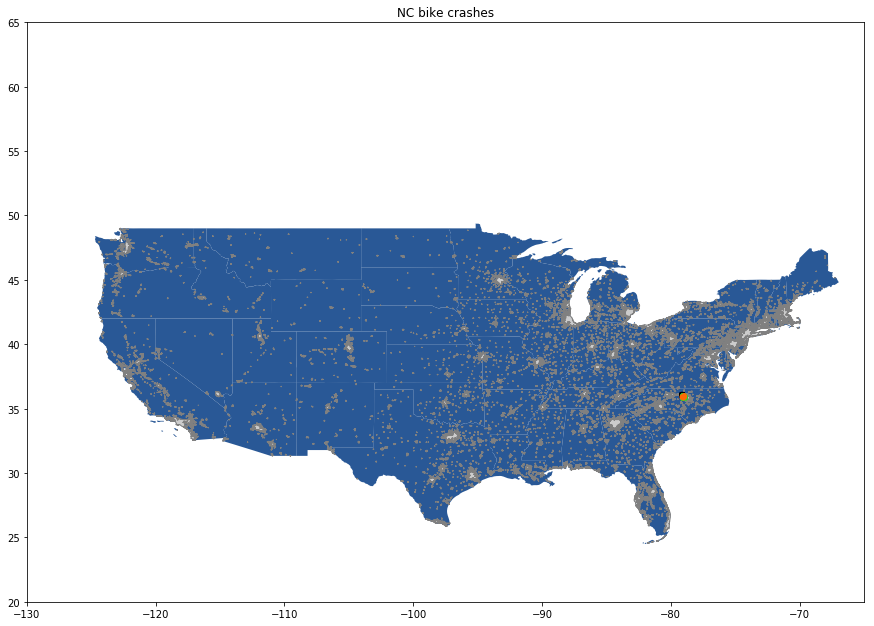

In [229]:
fig, ax = plt.subplots()

title='NC bike crashes'
ax.set(title=title)

states.plot(ax=ax, color='#295896', linewidth=.4, zorder=1);
urban.plot(ax=ax, edgecolor='gray', color='#cccccc', zorder=2);
streets.plot(ax=ax, edgecolor='black', color='#000000', zorder=3);
parks.plot(ax=ax, color='#32CD32', zorder=4);
bus.plot(ax=ax, color='#FAD71E', zorder=5);
lines.plot(ax=ax, color='#FA1E3D', zorder=6);
bicycles.plot(ax=ax, color='#fd6a05', zorder=7, markersize=8);

ax.set(xlim=(-130,-65), ylim=(20,65));

In [16]:
bicycles.geom_type.unique()

array(['Point'], dtype=object)

In [17]:
print(type(bicycles))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [18]:
print(type(urban_projected))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [19]:
print(type(states_projected))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [86]:
print(type(roads_projected))

<class 'geopandas.geodataframe.GeoDataFrame'>


In [88]:
roads_projected.geom_type.unique()

array(['LineString'], dtype=object)

In [40]:
states.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 10 columns):
STATEFP     52 non-null object
STATENS     52 non-null object
AFFGEOID    52 non-null object
GEOID       52 non-null object
STUSPS      52 non-null object
NAME        52 non-null object
LSAD        52 non-null object
ALAND       52 non-null int64
AWATER      52 non-null int64
geometry    52 non-null object
dtypes: int64(2), object(8)
memory usage: 4.1+ KB


In [46]:
states

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,02,01785533,0400000US02,02,AK,Alaska,00,1478588231566,277723861311,"(POLYGON ((-173.074642 60.704657, -172.912636 ..."
1,06,01779778,0400000US06,06,CA,California,00,403483182192,20484637928,"(POLYGON ((-118.593969 33.467198, -118.484785 ..."
2,08,01779779,0400000US08,08,CO,Colorado,00,268425964573,1178495763,"POLYGON ((-109.059962 38.499987, -109.05996197..."
3,11,01702382,0400000US11,11,DC,District of Columbia,00,158351639,18675956,"POLYGON ((-77.119759 38.934343, -77.0410179999..."
4,16,01779783,0400000US16,16,ID,Idaho,00,214048160737,2393355752,"POLYGON ((-117.243027 44.390974, -117.215072 4..."
5,17,01779784,0400000US17,17,IL,Illinois,00,143784114293,6211277447,"POLYGON ((-91.50616790862229 40.2006435127951,..."
6,19,01779785,0400000US19,19,IA,Iowa,00,144664158135,1081293682,"POLYGON ((-96.62187499999999 42.779255, -96.57..."
7,21,01779786,0400000US21,21,KY,Kentucky,00,102266092821,2388731561,"POLYGON ((-89.544434 36.57451, -89.47934599999..."
8,22,01629543,0400000US22,22,LA,Louisiana,00,111904803121,23746413153,"POLYGON ((-94.04305152761759 32.6930299766656,..."
9,24,01714934,0400000US24,24,MD,Maryland,00,25150696145,6980371026,"(POLYGON ((-76.04621299999999 38.025533, -76.0..."


In [59]:
nc = states_projected[states_projected['STATEFP'] == '37']

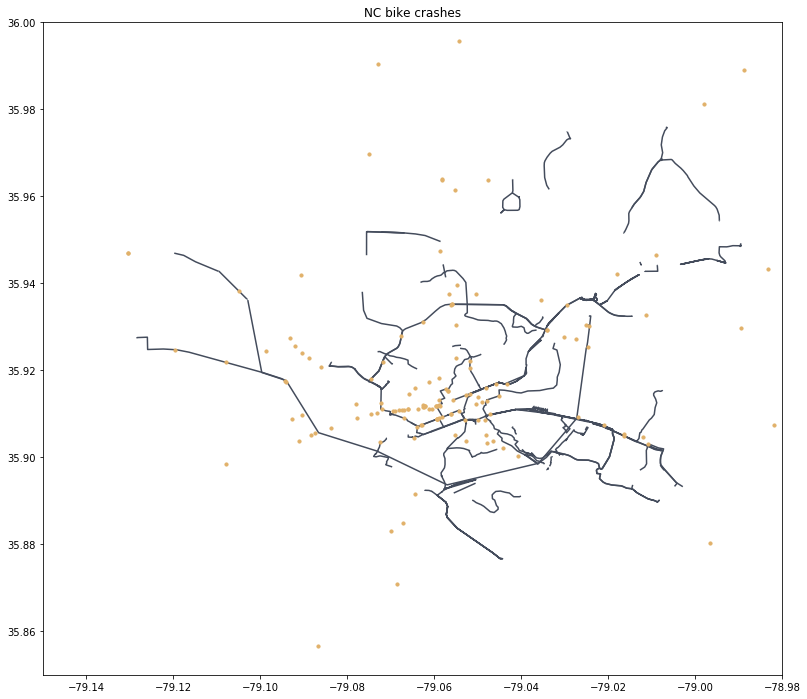

In [165]:
fig, ax = plt.subplots()

title='NC bike crashes'
ax.set(title=title)

# nc.plot(ax=ax, color='#E1B16A', linewidth=.4, zorder=1);
# town.plot(ax=ax, edgecolor='gray', color='#cccccc', zorder=2);
# urban.plot(ax=ax, edgecolor='gray', color='#cccccc', zorder=2);
# streets.plot(ax=ax, edgecolor='black', color='#000000', zorder=3);
# parks.plot(ax=ax, color='#32CD32', zorder=4);
# bus.plot(ax=ax, color='#FAD71E', zorder=5);
lines.plot(ax=ax, color='#444C5C', zorder=6);
bicycles.plot(ax=ax, color='#E1B16A', zorder=7, markersize=10);

# ax.set(xlim=(-80,-78), ylim=(35,37));

ax.set(xlim=(-79.15,-78.98), ylim=(35.85,36.0));

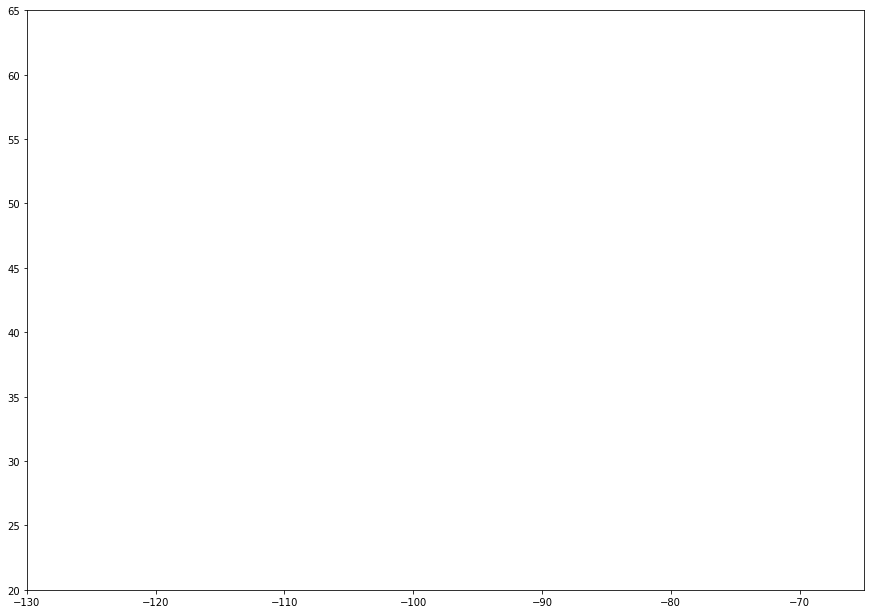

In [231]:
lines_eqdc = lines.to_crs('+proj=eqdc +lat_0=39 +lon_0=-96 +lat_1=33 +lat_2=45 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')
bicycles_eqdc = bicycles.to_crs('+proj=eqdc +lat_0=39 +lon_0=-96 +lat_1=33 +lat_2=45 +x_0=0 +y_0=0 +datum=NAD83 +units=m +no_defs')

fig, ax = plt.subplots()

lines_eqdc.plot(ax=ax, color='#444C5C', zorder=0);
bicycles_eqdc.plot(ax=ax, color='#E1B16A', zorder=1, markersize=10);

ax.set(xlim=(-130,-65), ylim=(20,65));


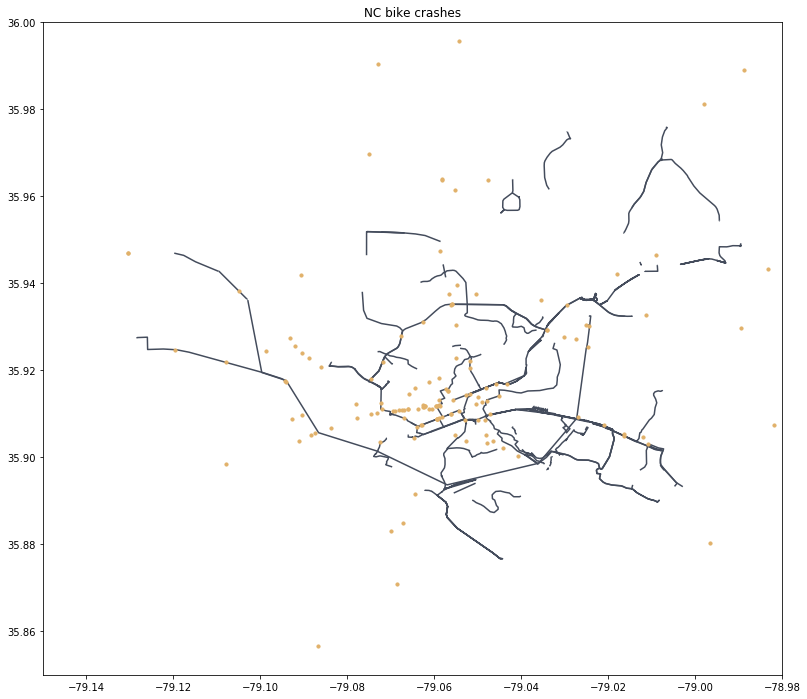

In [180]:
fig, ax = plt.subplots()

title='NC bike crashes'
ax.set(title=title)

lines.plot(ax=ax, colorproje='#444C5C', zorder=6);
bicycles.plot(ax=ax, color='#E1B16A', zorder=7, markersize=10);

ax.set(xlim=(-79.15,-78.98), ylim=(35.85,36.0));

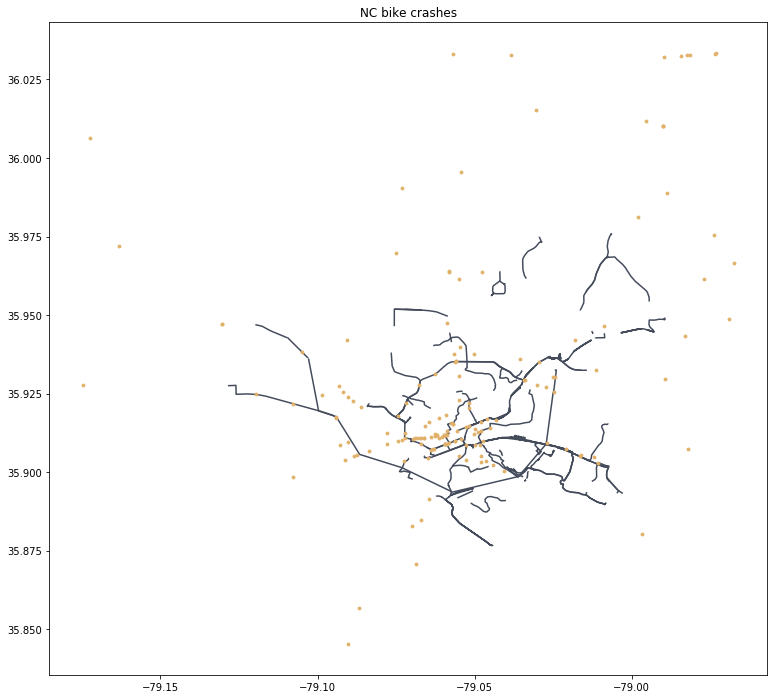

In [258]:
lines_eqdc = lines.to_crs('+proj=longlat +ellps=WGS84 +datum=WGS84 +units=m +no_defs')
bicycles_eqdc = bicycles.to_crs('+proj=longlat +ellps=WGS84 +datum=WGS84 +units=m +no_defs')

fig, ax = plt.subplots()

title='NC bike crashes'
ax.set(title=title)

lines_eqdc.plot(ax=ax, color='#444C5C', zorder=6);
bicycles_eqdc.plot(ax=ax, color='#E1B16A', zorder=7, markersize=8);

In [263]:
bicycles_eqdc['buffer'] = bicycles_eqdc.buffer(0.0000000005)
# note they are now polygons in meters
bicycles_eqdc['buffer'].head()
lines_eqdc.head()


,feature_type1,like_dislike_net,kmlid,gender_female,kmlname,lng,id,feature_description,feature_type,what_is_the_origin_of_your_trip,...,created_dd_mm_yyyy_1,select_from_dropdown,name,created,kmldescription,age,geo_point_2d,sub_id,survey,geometry
0,None,None,827586,Female,Route I'd like to ride if...,None,827586,None,line,Homestead Village,...,02/05/2015,I ride mostly for transportation,Route I'd like to ride if...,2015-02-05T22:02:39,None,18 and Younger,"{'lat': 35.9517405797, 'lon': -79.0695597762}",0,None,"LINESTRING (-79.07207999650001 35.9517119943, ..."
1,None,None,826040,Female,Route I'd like to walk if...,None,826040,None,line,franklin,...,12/16/2014,I walk for transportation or recreation,Route I'd like to walk if...,2014-12-16T10:19:44,None,25 to 34,"{'lat': 35.9320485282, 'lon': -79.0393712623}",0,None,"LINESTRING (-79.0344639683 35.9294320268, -79...."
2,None,None,817685,None,Route I'd like to ride if...,None,817685,None,line,Bolin Creek Trail,...,11/25/2014,I ride mostly for transportation,Route I'd like to ride if...,2014-11-25T11:17:14,None,None,"{'lat': 35.9324432445, 'lon': -79.0316504521}",0,None,"LINESTRING (-79.0351719951 35.9275640027, -79...."
3,None,None,817656,None,Route I'd like to ride if...,None,817656,None,line,Home,...,None,None,Route I'd like to ride if...,2014-11-24T17:48:33,None,None,"{'lat': 35.9025466411, 'lon': -79.0576154861}",0,None,"LINESTRING (-79.0621230057 35.8924570042, -79...."
4,None,None,1008350,Female,Route I'd like to ride if...,None,1008350,None,line,S11 parking lot,...,02/10/2016,I ride mostly for transportation,Route I'd like to ride if...,2016-02-10T09:16:04,None,25 to 34,"{'lat': 35.9013859916, 'lon': -79.0511818287}",0,None,"LINESTRING (-79.04557903040001 35.9017740115, ..."


In [238]:
print(bicycles_eqdc.geometry.name)

geometry


In [264]:
bicycles_eqdc = bicycles_eqdc.set_geometry('buffer')
# now the geometry is the buffer column
print(bicycles_eqdc.geometry.name)

buffer


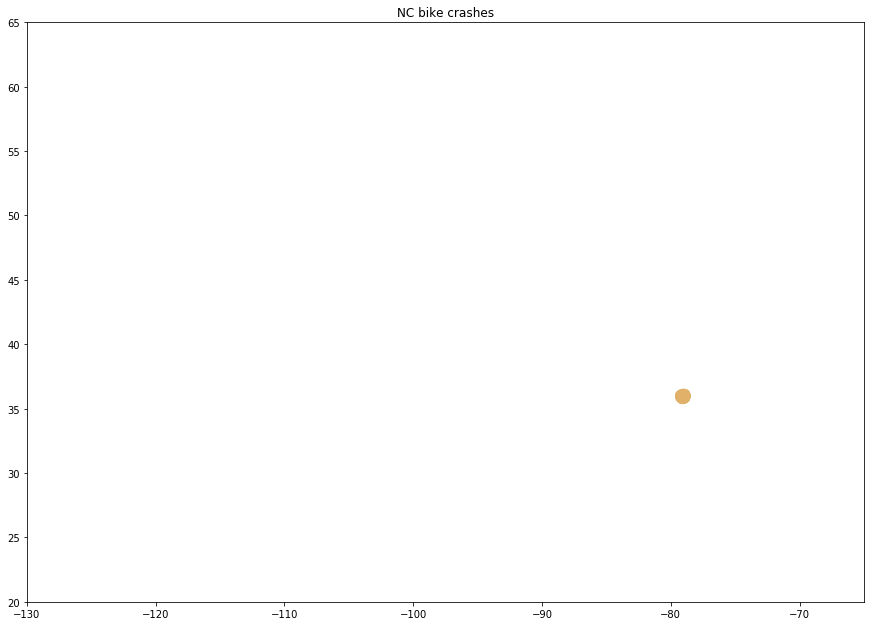

In [270]:
fig, ax = plt.subplots()

title='NC bike crashes'
ax.set(title=title)

lines_eqdc.plot(ax=ax, color='#444C5C', zorder=0);
bicycles_eqdc.plot(ax=ax, color='#E1B16A', zorder=1, markersize=1);

ax.set(xlim=(-130,-65), ylim=(20,65));

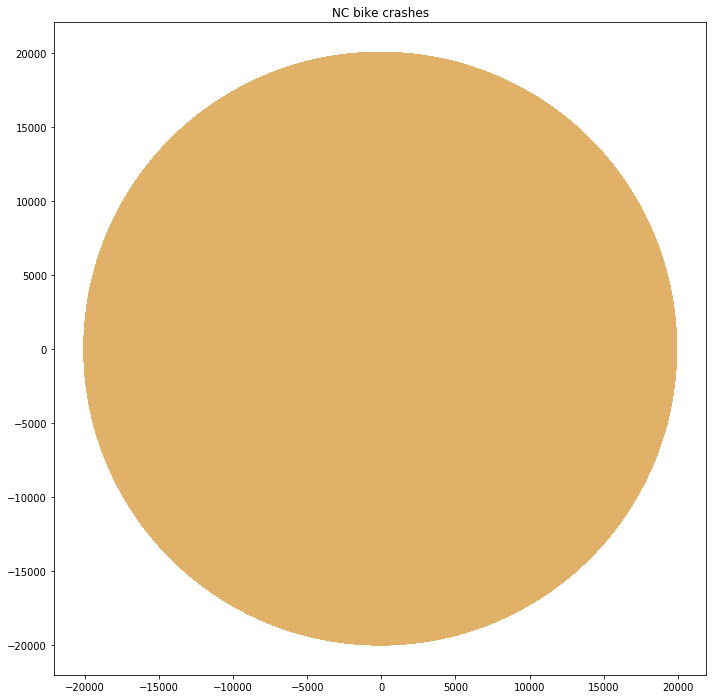

In [287]:
# bicycles_eqdc['buffer'] = bicycles_eqdc.buffer()
# bicycles_eqdc = bicycles_eqdc.set_geometry('buffer')

fig, ax = plt.subplots()

title='NC bike crashes'
ax.set(title=title)

lines_eqdc.plot(ax=ax, color='#444C5C', zorder=0);
bicycles_eqdc.plot(ax=ax, color='#E1B16A', zorder=1, markersize=10);



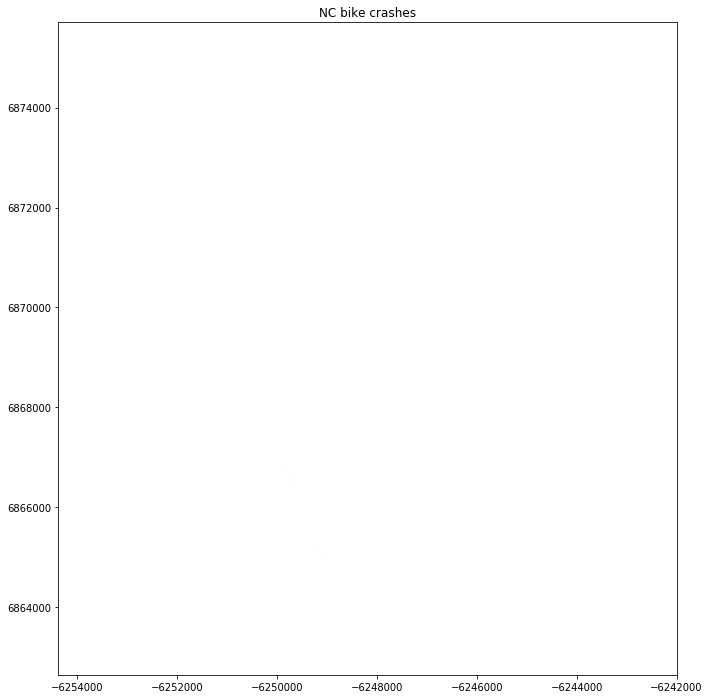

In [303]:
lines_eqdc = lines.to_crs('+proj=eqdc +lat_0=0 +lon_0=0 +lat_1=33 +lat_2=45 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs') 
bicycles_eqdc = bicycles.to_crs('+proj=eqdc +lat_0=0 +lon_0=0 +lat_1=33 +lat_2=45 +x_0=0 +y_0=0 +ellps=GRS80 +datum=NAD83 +units=m +no_defs')

fig, ax = plt.subplots()

title='NC bike crashes'
ax.set(title=title)

lines_eqdc.plot(ax=ax, color='#444C5C', zorder=0);
bicycles_eqdc.plot(ax=ax, color='#E1B16A', zorder=1, markersize=8);
